In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 40.1 MB/s eta 0:00:00


In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 7.0 MB/s eta 0:00:00


In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00


In [ ]:
from datasets import get_dataset_config_names

xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME 서브셋 개수: {len(xtreme_subsets)}")

XTREME 서브셋 개수: 183


In [ ]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets[:3]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

In [ ]:
from datasets import load_dataset

load_dataset("xtreme", name="PAN-X.de")

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [ ]:
from collections import defaultdict
from datasets import DatasetDict

langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]
#키가 없는 경우 DatseDict를 반환한다
panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
  ds = load_dataset('xtreme', name=f"PAN-X.{lang}")
  for split in ds:
    panx_ch[lang][split] = (
        ds[split].shuffle(seed=0)
        .select(range(int(frac * ds[split].num_rows)))
    )

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd

pd.DataFrame({lang:[panx_ch[lang]['train'].num_rows] for lang in langs},\
             index = ["number of training example"])

,de,fr,it,en
number of training example,12580,4580,1680,1180


In [ ]:
element = panx_ch['de']['train'][0]
for key, value in element.items():
  print(f"{key}:{value}")

tokens:['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags:[0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs:['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [ ]:
for key, value in panx_ch['de']['train'].features.items():
  print(f"{key}:{value}")

tokens:Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags:Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs:Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [ ]:
panx_ch['de']['train'].features['ner_tags']

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)

In [ ]:
tags = panx_ch['de']['train'].features['ner_tags'].feature
tags

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)

In [ ]:
def create_tags_name(batch):
  return {'ner_tags_str':[tags.int2str(idx) for idx in batch['ner_tags']]}

panx_de = panx_ch['de'].map(create_tags_name)

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [ ]:
tags.int2str([2,3])

['I-PER', 'B-ORG']

In [ ]:
de_example = panx_de['train'][0]
pd.DataFrame([de_example['tokens'], de_example['ner_tags_str']],\
             ['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [ ]:
from collections import Counter

split2freqs = defaultdict(Counter)
for split, dataset in panx_de.items():
  for row in dataset['ner_tags_str']:
    for tag in row:
      if tag.startswith("B"):
        tag_type = tag.split("-")[1]
        split2freqs[split][tag_type] += 1

pd.DataFrame.from_dict(split2freqs, orient='index')

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


In [ ]:
split2freqs

defaultdict(collections.Counter,
            {'train': Counter({'LOC': 6186, 'ORG': 5366, 'PER': 5810}),
             'validation': Counter({'ORG': 2683, 'LOC': 3172, 'PER': 2893}),
             'test': Counter({'LOC': 3180, 'PER': 3071, 'ORG': 2573})})

In [ ]:
#4.2 다중 언어 트랜스포머

from transformers import AutoTokenizer

bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

In [ ]:
text = "Jack Sparrow laves New York!"
bert_token = bert_tokenizer(text).tokens()
xlmr_token = xlmr_tokenizer(text).tokens()

In [ ]:
pd.DataFrame([bert_token , xlmr_token], index = ['BERT', 'XLMR'])

,0,1,2,3,4,5,6,7,8,9
BERT,[CLS],Jack,Spa,##rrow,la,##ves,New,York,!,[SEP]
XLMR,<s>,▁Jack,▁Spar,row,▁la,ves,▁New,▁York,!,</s>


In [ ]:
"".join(xlmr_token).replace(u"\u2581", ' ') # xmlr토큰에선 _가 띄어쓰기를 의미 토큰 사이에 띄어쓰기가 있는지에 대한 정보를 가지고 있음

'<s> Jack Sparrow laves New York!</s>'

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

class XLMRobertaForClassification(RobertaPreTrainedModel):
  config_class = XLMRobertaConfig

  def __init__(self, config):
    super().__init__(config)
    self.num_labels = config.num_labels
    #load model body
    self.roberta = RobertaModel(config, add_pooling_layer=False)
    #head for classification
    self.dropout = nn.Dropout(config.hidden_dropout_prob)
    self.classifier = nn.Linear(config.hidden_size, config.num_labels)
    #initialize weight
    self.init_weights()

  def forward(self, input_ids=None, attention_mask=None, token_type_ids=None,\
              labels=None, **kwargs):
    #모델 바디를 사용해 인코더
    outputs = self.roberta(input_ids, attention_mask=attention_mask,\
                           token_type_ids=token_type_ids, **kwargs)
    #인코더 아웃풋을 헤드에
    sequence_output = self.dropout(outputs[0])
    logits = self.classifier(sequence_output)
    #손실 계산
    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, \
                                 hidden_states=outputs.hidden_states,\
                                 attentions=outputs.attentions)

In [ ]:
index2tag = {idx:tag for idx, tag in enumerate(tags.names)}
tag2index = {tag:idx for idx, tag in enumerate(tags.names)}

In [ ]:
from transformers import AutoConfig

xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,\
                                         num_lables=tags.num_classes,\
                                         id2label=index2tag, label2id=tag2index)

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
xlmr_model = (XLMRobertaForClassification.from_pretrained(xlmr_model_name, config=xlmr_config)\
              .to(device))

Some weights of XLMRobertaForClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
input_ids = xlmr_tokenizer.encode(text, return_tensors='pt')
pd.DataFrame([xlmr_token, input_ids[0].numpy()], index=['Tokens', 'Input IDs'])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁la,ves,▁New,▁York,!,</s>
Input IDs,0,21763,37456,15555,21,3132,2356,5753,38,2


In [ ]:
outputs = xlmr_model(input_ids.to(device)).logits
predictions = torch.argmax(outputs, dim=-1)
print(f"시퀀스에 있는 토큰 개수: {len(xlmr_token)}")
print(f"출력 크기: {outputs.shape}")

시퀀스에 있는 토큰 개수: 10
출력 크기: torch.Size([1, 10, 7])


In [ ]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_token,preds], index=['Token', 'Tags'])

,0,1,2,3,4,5,6,7,8,9
Token,<s>,▁Jack,▁Spar,row,▁la,ves,▁New,▁York,!,</s>
Tags,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O


In [ ]:
## 헬퍼 함수 : 모델의 예측결과를 token과 tag의 데이터프레임으로 보여줌
def tag_text(text, tags, model, tokenizer):
  tokens = tokenizer(text).tokens()
  input_ids = tokenizer(text, return_tensors="pt").input_ids.to(device)
  outputs = model(input_ids)[0]
  predictions = torch.argmax(outputs, dim=2)
  preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
  return pd.DataFrame([tokens, preds], index=['Token', 'Tags'])

In [ ]:
tag_text(text, tags, xlmr_model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9
Token,<s>,▁Jack,▁Spar,row,▁la,ves,▁New,▁York,!,</s>
Tags,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O


In [ ]:
words, labels = de_example['tokens'], de_example['ner_tags']

In [ ]:
labels

[0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]

In [ ]:
tokenized_input = xlmr_tokenizer(de_example['tokens'], is_split_into_words=True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input['input_ids'])
pd.DataFrame([tokens], index=['Tokens'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In [ ]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index=['Tokens', 'Word IDs'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [ ]:
previous_word_idx = None
label_ids = []

for word_id in word_ids:
  if word_id == None or word_id == previous_word_idx:
    label_ids.append(-100)
  elif word_id != previous_word_idx:
    label_ids.append(labels[word_id])
  previous_word_idx = word_id

labels = [index2tag[l] if l !=-100 else "IGN" for l in label_ids]
index = ["Tokens", 'Word_IDs', 'Label IDs', 'Labels']

pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word_IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [ ]:
def tokenize_and_align_labels(examples):
  tokenized_inputs = xlmr_tokenizer(examples['tokens'], truncation=True,\
                                   is_split_into_words=True)
  labels = []
  for idx, label in enumerate(examples['ner_tags']):
    word_ids = tokenized_inputs.word_ids(batch_index=idx)
    previous_word_idx = None
    label_ids = []
    for word_idx in word_ids:
      if word_idx == None or word_idx == previous_word_idx:
        label_ids.append(-100)
      else:
        label_ids.append(label[word_idx])
      previous_word_idx = word_idx

    labels.append(label_ids)
  tokenized_inputs['labels'] = labels
  return tokenized_inputs


In [ ]:
def encode_panx_dataset(corpus):
  return corpus.map(tokenize_and_align_labels, batched=True,\
                    remove_columns=['langs', 'ner_tags', 'tokens'])

In [ ]:
panx_de_encoded = encode_panx_dataset(panx_ch['de'])

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [ ]:
pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=eb86d8c349bc1c060a372fbe4d278745d28e9139e44971c1b7085096c51acf4a
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
from seqeval.metrics import classification_report

y_true = [['O','O','O',"B-MISC",'I-MISC', 'I-MISC', 'O'],
          ['B-PER', 'I-PER', 'O']]
y_pred = [["O",'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O'],
          ['B-PER', 'I-PER', 'O']]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [ ]:
import numpy as np

def align_predictions(predictions, label_ids):
  preds = np.argmax(predictions, axis=2)
  batch_size, seq_len = preds.shape
  labels_list, preds_list = [], []

  for batch_idx in range(batch_size):
    example_labels, example_preds = [], []
    for seq_idx in range(seq_len):
      if label_ids[batch_idx, seq_idx] != -100:
        example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
        example_preds.append(index2tag[preds[batch_idx][seq_idx]])

    labels_list.append(example_labels)
    preds_list.append(example_preds)

  return preds_list, labels_list

In [ ]:
from transformers import TrainingArguments

num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded['train']) // batch_size
model_name = f"{xlmr_model_name}-finetuned-panx-de"
training_args = TrainingArguments(
    output_dir=model_name, log_level="error", num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size, evaluation_strategy="epoch",
    save_steps=1e6, weight_decay=0.01, disable_tqdm=False,
    logging_steps=logging_steps, push_to_hub=True
)

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
  y_pred, y_true = align_predictions(eval_pred.predictions,\
                                     eval_pred.label_ids)
  return {"f1": f1_score(y_true, y_pred)}

In [ ]:
from transformers.models.xlm_roberta.modeling_xlm_roberta import XLMRobertaForTokenClassification

def model_init():
  return (XLMRobertaForTokenClassification\
          .from_pretrained(xlmr_model_name, config=xlmr_config)\
          .to(device))

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [ ]:
from transformers import Trainer

trainer = Trainer(model_init=model_init, args=training_args, data_collator=data_collator, compute_metrics=compute_metrics,\
                  train_dataset=panx_de_encoded['train'],\
                  eval_dataset=panx_de_encoded['validation'],\
                  tokenizer=xlmr_tokenizer)

In [ ]:
trainer.train()
trainer.push_to_hub(commit_message="Training completed3!")

Epoch,Training Loss,Validation Loss,F1
1,0.264300,0.156079,0.823788
2,0.128300,0.149886,0.846171
3,0.082400,0.133489,0.862625


training_args.bin:   0%|          | 0.00/4.54k [00:00<?, ?B/s]

'https://huggingface.co/allspace/xlm-roberta-base-finetuned-panx-de/tree/main/'

In [ ]:
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de,tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Token,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


In [ ]:
def get_f1_score(trainer, dataset):
  return trainer.predict(dataset).metrics['test_f1']

In [ ]:
f1_scores = defaultdict(dict)
f1_scores['de']['de'] = get_f1_score(trainer, panx_de_encoded['test'])
print(f"[de] 데이터셋에서 [de] 모델의 f1점수: {f1_scores['de']['de']:.3f}")

[de] 데이터셋에서 [de] 모델의 f1점수: 0.869


In [ ]:
text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Token,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [ ]:
def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds["test"])

In [ ]:
f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)
print(f"[fr] 데이터셋에서 [de] 모델의 F1-점수: {f1_scores['de']['fr']:.3f}")

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

[fr] 데이터셋에서 [de] 모델의 F1-점수: 0.715


In [ ]:
f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)
print(f"[it] 데이터셋에서 [de] 모델의 F1-점수: {f1_scores['de']['it']:.3f}")

Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

[it] 데이터셋에서 [de] 모델의 F1-점수: 0.692


In [ ]:
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"[en] 데이터셋에서 [de] 모델의 F1-점수: {f1_scores['de']['en']:.3f}")

Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

[en] 데이터셋에서 [de] 모델의 F1-점수: 0.597


In [ ]:
def train_on_subset(dataset, num_samples):
  train_ds = dataset['train'].shuffle(seed=42).select(range(num_samples))
  valid_ds = dataset['validation']
  test_ds = dataset['test']
  training_args.logging_steps = len(train_ds) // batch_size

  trainer = Trainer(model_init=model_init, args=training_args,\
                    data_collator=data_collator, compute_metrics=compute_metrics,\
                    train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)
  trainer.train()
  if training_args.push_to_hub:
    trainer.push_to_hub(commit_message="Training completed")

  f1_score = get_f1_score(trainer, test_ds)
  return pd.DataFrame.from_dict(
      {"num_samples":[len(train_ds)], "f1_score":[f1_score]}
  )

In [ ]:
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

In [ ]:
training_args.push_to_hub = False
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

Epoch,Training Loss,Validation Loss,F1
1,1.558300,1.351694,0.000000
2,1.306100,1.155362,0.100533
3,1.091700,1.059357,0.185573


,num_samples,f1_score
0,250,0.18089


In [ ]:
for num_samples in [500, 1000, 2000, 4000]:
  metrics_df = metrics_df.append(
      train_on_subset(panx_fr_encoded, num_samples), ignore_index=True
  )

Epoch,Training Loss,Validation Loss,F1
1,1.372100,1.093317,0.151709
2,0.950200,0.744997,0.516602
3,0.657600,0.624087,0.623870


<ipython-input-66-7856406e2d3d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(


Epoch,Training Loss,Validation Loss,F1
1,1.221100,0.896767,0.286284
2,0.653500,0.445358,0.688673
3,0.370500,0.396576,0.735587


<ipython-input-66-7856406e2d3d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(


Epoch,Training Loss,Validation Loss,F1
1,0.731900,0.376290,0.732699
2,0.316700,0.330767,0.799601
3,0.217300,0.337492,0.803866


<ipython-input-66-7856406e2d3d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(


Epoch,Training Loss,Validation Loss,F1
1,0.581400,0.322158,0.800467
2,0.268300,0.281436,0.828317
3,0.175500,0.278061,0.837311


<ipython-input-66-7856406e2d3d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(


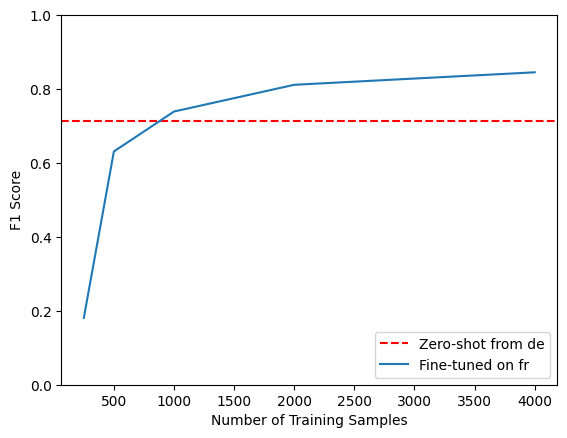

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.axhline(f1_scores["de"]["fr"], ls="--", color="r")
metrics_df.set_index("num_samples").plot(ax=ax)
plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")
plt.ylim((0, 1))
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.show()

In [ ]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
            [corpus[split] for corpus in corpora]).shuffle(seed=42)
    return multi_corpus

In [ ]:
panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

In [ ]:
training_args.logging_steps = len(panx_de_fr_encoded["train"]) // batch_size
training_args.push_to_hub = True
training_args.output_dir = "xlm-roberta-base-finetuned-panx-de-fr"

trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=panx_de_fr_encoded["train"],
    eval_dataset=panx_de_fr_encoded["validation"])

trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

Epoch,Training Loss,Validation Loss,F1
1,0.289400,0.177264,0.820185
2,0.146400,0.163264,0.840257
3,0.093400,0.162956,0.859169


pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

'https://huggingface.co/allspace/xlm-roberta-base-finetuned-panx-de-fr/tree/main/'

In [ ]:
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"[{lang}] 데이터셋에서 [de-fr] 모델의 F1-점수: {f1:.3f}")

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

[de] 데이터셋에서 [de-fr] 모델의 F1-점수: 0.865


[fr] 데이터셋에서 [de-fr] 모델의 F1-점수: 0.859


[it] 데이터셋에서 [de-fr] 모델의 F1-점수: 0.792


[en] 데이터셋에서 [de-fr] 모델의 F1-점수: 0.672


In [ ]:
corpora = [panx_de_encoded]

# 반복에서 독일어는 제외합니다.
for lang in langs[1:]:
    training_args.output_dir = f"xlm-roberta-base-finetuned-panx-{lang}"
    # 단일 언어 말뭉치에서 미세 튜닝합니다.
    ds_encoded = encode_panx_dataset(panx_ch[lang])
    metrics = train_on_subset(ds_encoded, ds_encoded["train"].num_rows)
    # 딕셔너리에 F1-점수를 모읍니다.
    f1_scores[lang][lang] = metrics["f1_score"][0]
    # 단일 언어 말뭉치를 corpora 리스트에 추가합니다.
    corpora.append(ds_encoded)

Epoch,Training Loss,Validation Loss,F1
1,0.555500,0.318943,0.791694
2,0.262900,0.281530,0.824770
3,0.171400,0.274864,0.846206


pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch,Training Loss,Validation Loss,F1
1,0.727700,0.306066,0.776278
2,0.289900,0.254675,0.811559
3,0.192700,0.250664,0.819365


tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,F1
1,1.003800,0.570498,0.587786
2,0.490100,0.426381,0.665179
3,0.343600,0.407454,0.678571


Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

In [ ]:
corpora_encoded = concatenate_splits(corpora)

In [ ]:
training_args.logging_steps = len(corpora_encoded["train"]) // batch_size
training_args.output_dir = "xlm-roberta-base-finetuned-panx-all"

trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=corpora_encoded["train"],
    eval_dataset=corpora_encoded["validation"])

trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

Epoch,Training Loss,Validation Loss,F1
1,0.296700,0.193475,0.813478
2,0.156800,0.168029,0.846920
3,0.103500,0.174448,0.857319


training_args.bin:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

'https://huggingface.co/allspace/xlm-roberta-base-finetuned-panx-all/tree/main/'

In [ ]:
for idx, lang in enumerate(langs):
    f1_scores["all"][lang] = get_f1_score(trainer, corpora[idx]["test"])

In [ ]:
scores_data = {"de": f1_scores["de"],
               "each": {lang: f1_scores[lang][lang] for lang in langs},
               "all": f1_scores["all"]}
f1_scores_df = pd.DataFrame(scores_data).T.round(4)
f1_scores_df.rename_axis(index="Fine-tune on", columns="Evaluated on",
                         inplace=True)
f1_scores_df

Evaluated on,de,fr,it,en
Fine-tune on,,,,
de,0.8693,0.7146,0.6920,0.5969
each,0.8693,0.8457,0.8116,0.7201
all,0.8728,0.8711,0.8715,0.7775
